Compare nuclear and mitochondrial DNA

In [1]:
library(remotes)
library(ggplot2)
library(tidyverse)
library(RColorBrewer)
library(dplyr)
library(ggpubr)
library(data.table)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




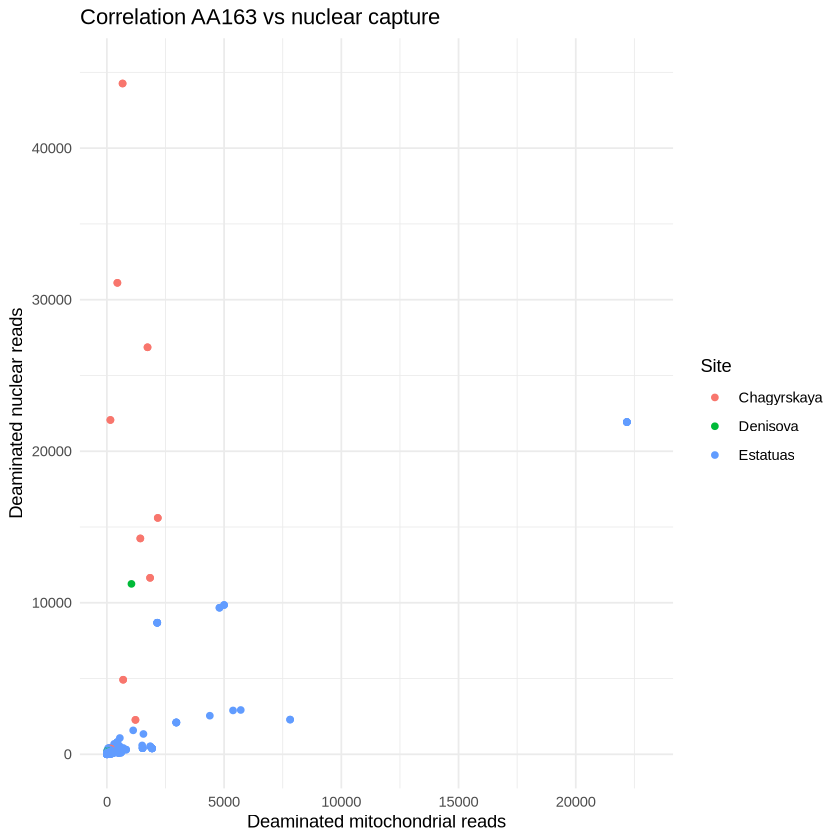

In [116]:
ben_table_nuclear <- read.csv("/mnt/expressions/Aurore/ben_vernot_paper/abf1667-vernot-sm-table-s13.csv",header=TRUE,sep=";", fileEncoding = "latin1") %>% 
rename(Deaminated.hominid.sequences.nuclear = Deaminated.hominid.sequences) %>% 
rename(Indexed.library.ID = "Indexed.Library.ID")

ben_table_mito <- read.csv("/mnt/expressions/Aurore/ben_vernot_paper/abf1667-vernot-sm-table-s10.csv", sep=";",  fileEncoding = "latin1")

probe_info <- read.csv("/mnt/expressions/Aurore/ben_vernot_paper/abf1667-vernot-sm-table-s12.csv", sep=";",  fileEncoding = "latin1") %>% 
rename(Indexed.library.ID = "Indexed.Library.ID") %>% 
rename(probeset="Capture.array..for.sediments....array.sites.used..for.skeletal.samples.")


full <- ben_table_nuclear %>% 
  full_join(ben_table_mito, by = c("Indexed.library.ID")) %>% 
  full_join(probe_info, by = c("Indexed.library.ID", "Site")) %>%
  filter(Site %in% c("Estatuas", "Denisova", "Chagyrskaya")) %>% 
  select(Deaminated.hominid.sequences.nuclear, Deaminated.hominid.sequences, Site) %>% 
  mutate(Deaminated.hominid.sequences.nuclear = gsub(" ", "", Deaminated.hominid.sequences.nuclear))


full$Deaminated.hominid.sequences.nuclear <- as.numeric(full$Deaminated.hominid.sequences.nuclear)
full$Deaminated.hominid.sequences <- as.numeric(full$Deaminated.hominid.sequences)



#p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(full, aes(x = Deaminated.hominid.sequences, y = Deaminated.hominid.sequences.nuclear , color = Site)) +
  geom_point() +
  #geom_smooth(method = "lm", se = FALSE, aes(color=Site), formula=y~x+0) +  
  #stat_cor(method = "pearson", label.x = 2000, label.y = 1000, aes(color=Site))  +
 # annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  #scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA163 vs nuclear capture",
    x = "Deaminated mitochondrial reads",
    y = "Deaminated nuclear reads"
  )+
  coord_cartesian(xlim = c(0, 23000), ylim = c(0, 45000)) 

In [3]:
#table with both results
old_id_sample <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/config/old_id_sample_to_library.csv", header=FALSE) %>%
  rename(old_sampleid = V3,
         indexlibid = V2,
         probeset = V1)

nuclear <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/config/nuclear_data_true_site_2025.csv") %>%
  full_join(old_id_sample, by = c("indexlibid", "probeset"))  %>%
  rename(IndexLibID="indexlibid")

nuclear <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/new_nuclear_results_with_cov.txt") %>%
  full_join(nuclear, by = c("IndexLibID", "probeset")) 
nuclear

nuclear_mito <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclear_mito_result_with_cov.txt")
nuclear_mito$Deaminated_term3 <- as.numeric(nuclear_mito$Deaminated_term3)
nuclear_mito$primates <- as.numeric(nuclear_mito$primates)
nuclear_mito$target <- as.numeric(nuclear_mito$target)
nuclear_mito$Unique <- as.numeric(nuclear_mito$Unique)

Warning message in full_join(., old_id_sample, by = c("indexlibid", "probeset")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 86 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


IndexLibID,MD_score,N_score,probeset,split,mapped,rmdup,target,deam,primates,⋯,country,locality,province,site_type,freshkill_id,layer_information,cultural_technological_complex,context_date_upper,context_date_lower,old_sampleid
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
Lib.E.7082,ALL,ALL,AA211,5199214,421833,1327,364,34,24,⋯,Montenegro,,,Rockshelter,SP5060,"Layer XII, lower part a.k.a. M2 ~39.3 - 44.5 ka.,north-facing profile",,NA,NA,SP5060
Lib.E.8092,ALL,ALL,AA211,2206712,214080,11811,7367,963,823,⋯,Germany,,,Cave,SP4845,layer 1kd (Magdalenian),,NA,NA,SP4845
Lib.E.8104,ALL,ALL,AA211,3401361,238051,1358,210,13,6,⋯,Spain,,,Cave,SP4783,Unit: IIb - square I16 (profile W),,NA,NA,SP4783
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,Russia,,,Cave,SP7470,East Chamber (Southeast profile wall) E150 Layer(s) 14,,NA,NA,SP7470
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,Russia,,,Cave,SP7470,East Chamber (Southeast profile wall) E150 Layer(s) 14,,NA,NA,SP7470
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,Russia,,,Cave,SP7470,East Chamber (Southeast profile wall) E150 Layer(s) 14,,NA,NA,SP7470
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,Russia,,,Cave,SP7470,East Chamber (Southeast profile wall) E150 Layer(s) 14,,NA,NA,SP7470
Lib.F.7199,ALL,ALL,AA197-AA200,2362951,301248,16463,873,84,16,⋯,Russia,,,Cave,SP7179,South chamber Southeast profile upper S55 layer 11,,NA,NA,SP7179
Lib.F.7199,ALL,ALL,AA197-AA200,2362951,301248,16463,873,84,16,⋯,Russia,,,Cave,SP7179,South chamber Southeast profile upper S55 layer 11,,NA,NA,SP7179


Look for the overall content

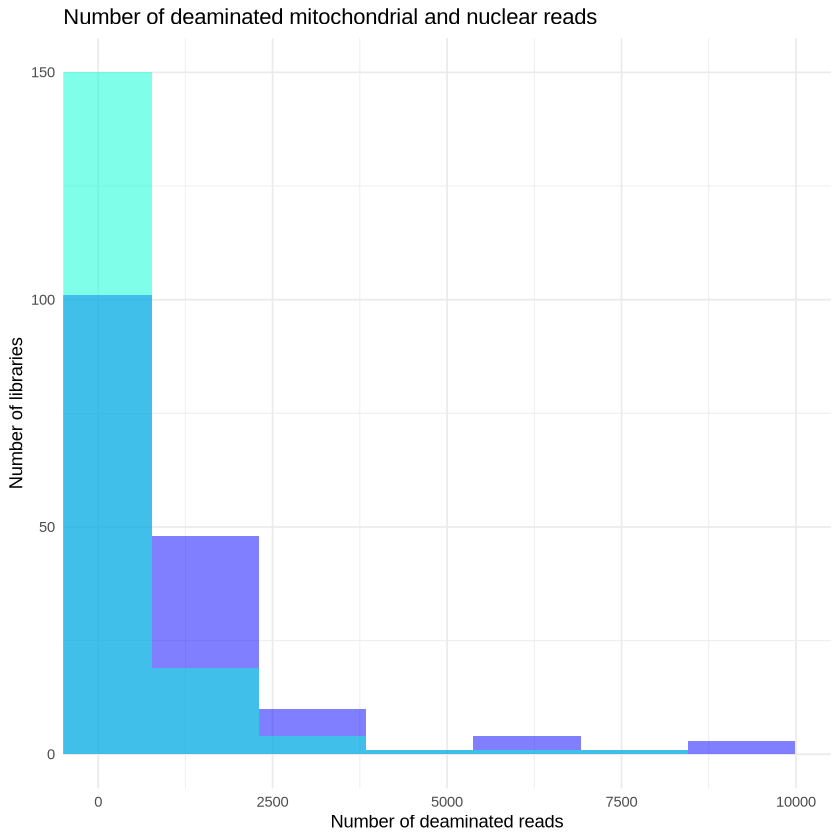

In [69]:
nuclear_mito_AA163 <- nuclear_mito %>%  
filter(ProbeSet=="AA163") %>%
select(Deaminated_term3, deam,IndexLibID_new, Site, probeset)


ggplot(nuclear_mito_AA163) +
  geom_histogram(aes(x = deam), fill = "blue", alpha = 0.5, bins = 100) +   # Histogram for 'deam' in blue
  geom_histogram(aes(x = Deaminated_term3), fill = "#00ffd5", alpha = 0.5, bins = 100) +  # Histogram for 'Deaminated_term3' in yellow
  labs(title = "Number of deaminated mitochondrial and nuclear reads", x = "Number of deaminated reads", y = "Number of libraries") +
  theme_minimal() +
  theme(legend.position = "top")+ 
  coord_cartesian(xlim = c(0, 10000)) 

In [5]:
unique(nuclear_mito_AA163$Site)

[1] "Crvena Stijena Rockshelter, Montenegro"
 [2] "Hohle Fels, Germany"                   
 [3] "Teixoneres Cave, Spain"                
 [4] "Denisova Cave, Russia"                 
 [5] "Nad Hronom, Slovakia"                  
 [6] "Gorsza, Hungary"                       
 [7] "Ortvale Klde, Georgia"                 
 [8] "Vrable, Slovakia"                      
 [9] "Quincay, France"                       
[10] "Le Grand Abri aux Puces, France"       
[11] "Grotte Mandrin, France"                
[12] "El Castillo Cave, Spain"               
[13] "Didnauri, Georgia"

In [59]:
nuclear_with_sites <- nuclear %>% 
  filter(!is.na(split)) %>%  # Filter out rows where 'split' is NA
  mutate(Site = case_when(
    V9 == "Malta" ~ "Latnija, Malta",
    V9 == "Hungary" ~ "Gorsza, Hungary",
    V9 == "Russia" ~ "Denisova Cave, Russia",
    V9 == "Norway" ~ "Sorsanna, Norway",
    V9=="Slovakia" ~ "Vrable, Slovakia",
    V13 == "Crvena Stijena" ~ "Crvena Stijena, Montenegro",
    V13 == "Vindija" ~ "Vindija Cave, Croatia",
    V13 == "Ortvale Klde" ~ "Ortvale Klde, Georgia",
    V13 == "Teixoneres" ~ "Teixoneres Cave, Spain",
    V13 == "El Sidron" ~ "El Sidron, Spain",
    V13 == "Hohle Fels" ~ "Hohle Fels, Germany",
    V13 == "Quincay" ~ "Quincay, France",
    V13 == "Tsutskhvati Cave" ~ "Tsutskhvati Cave, Georgia",
    V13 == "Grand-abri-aux-puces" ~ "Grand-abri-aux-puces, France",
    V13 == "Grotte Mandrin" ~ "Grotte Mandrin, France",
    V13 == "El Castillo Cave" ~ "El Castillo Cave, Spain",
    V10 == "Vrable" ~ "Vrable, Slovakia",
    V10 == "Rgani" ~ "Ortvale Klde, Georgia",
    V10 == "right tributary of the Ruhr" ~ "right tributary of the Ruhr, Germany",
    V10 == "Prigglitz" ~ "Prigglitz, Austria",
    V11=="Kakheti" ~ "Kakheti, settlement Georgia",
    V11=="Asturias" ~ "Asturias, Spain",
    V11=="Cantabria" ~ "Cantabria, Spain",
    TRUE ~ "Grotte Mandrin, France"  # In case none of the above conditions match
  ))






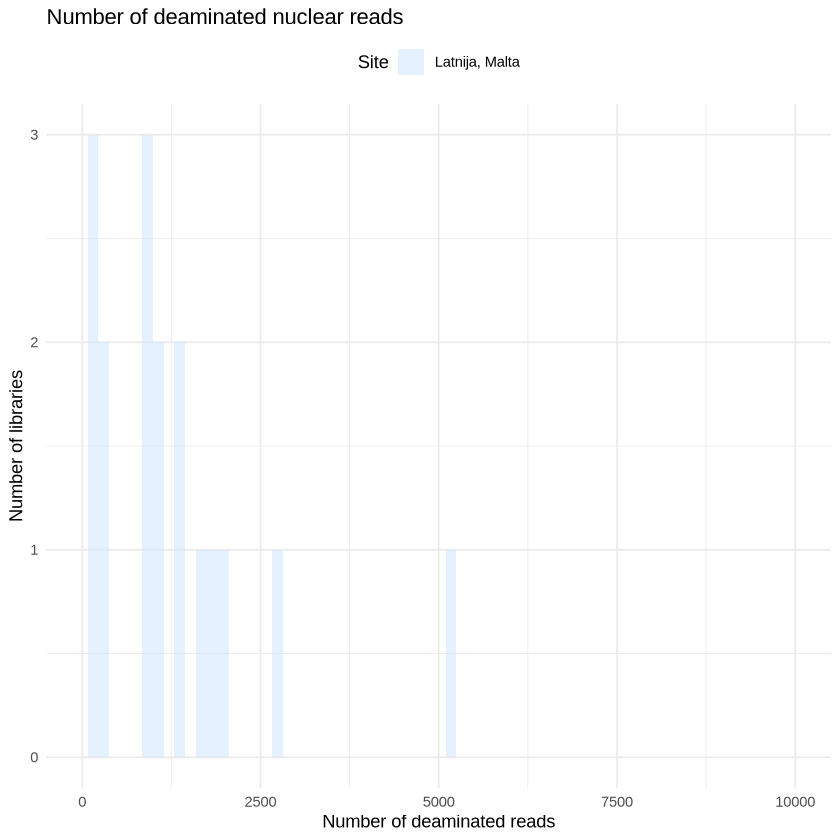

In [ ]:

site_colors <- c(
  "Crvena Stijena Rockshelter, Montenegro" = "#FFB3BA",  # Soft Pink
  "Hohle Fels, Germany" = "#FFDFBA",                   # Peach
  "Teixoneres Cave, Spain" = "#FFFFBA",                 # Pale Yellow
  "Denisova Cave, Russia" = "#BAFFB3",                  # Pale Green
  "Nad Hronom, Slovakia" = "#BAE1FF",                   # Light Blue
  "Gorsza, Hungary" = "#C4A3FF",                        # Lavender
  "Ortvale Klde, Georgia" = "#FFB7FF",                  # Light Pink
  "Vrable, Slovakia" = "#F0E68C",                       # Khaki
  "Quincay, France" = "#E0BBE4",                        # Light Purple
  "Le Grand Abri aux Puces, France" = "#D3FFCE",        # Light Mint
  "Grotte Mandrin, France" = "#B8D8D8",                 # Light Cyan
  "El Castillo Cave, Spain" = "#F4C2C2",                # Pale Coral
  "Didnauri, Georgia" = "#E1FFC7" ,
  "Latnija, Malta" =  "#cee3ff",
  "Teixoneres, Spain" = "#ffdeb3"                    # Soft Lime Green
)

ggplot(nuclear_with_sites %>% filter(Site=="Latnija, Malta")) +
  geom_histogram(aes(x = deam, fill = Site), alpha = 0.5, bins = 1000) +   # Histogram for 'deam' in blue
 # geom_histogram(aes(x = Deaminated_term3), fill = "#00ffd5", alpha = 0.5, bins = 100) +  # Histogram for 'Deaminated_term3' in yellow
  labs(title = "Number of deaminated nuclear reads", x = "Number of deaminated reads", y = "Number of libraries") +
  theme_minimal() +
  theme(legend.position = "top")+ 
  coord_cartesian(xlim = c(0, 10000)) +
  scale_fill_manual(values = site_colors) 


ggplot(nuclear_with_sites %>% filter(Site=="Latnija, Malta")) +
  geom_histogram(aes(x = deam, fill = Site), alpha = 0.5, bins = 1000) +   # Histogram for 'deam' in blue
 # geom_histogram(aes(x = Deaminated_term3), fill = "#00ffd5", alpha = 0.5, bins = 100) +  # Histogram for 'Deaminated_term3' in yellow
  labs(title = "Number of deaminated nuclear reads", x = "Number of deaminated reads", y = "Number of libraries") +
  theme_minimal() +
  theme(legend.position = "top")+ 
  coord_cartesian(xlim = c(0, 10000)) +
  scale_fill_manual(values = site_colors) 

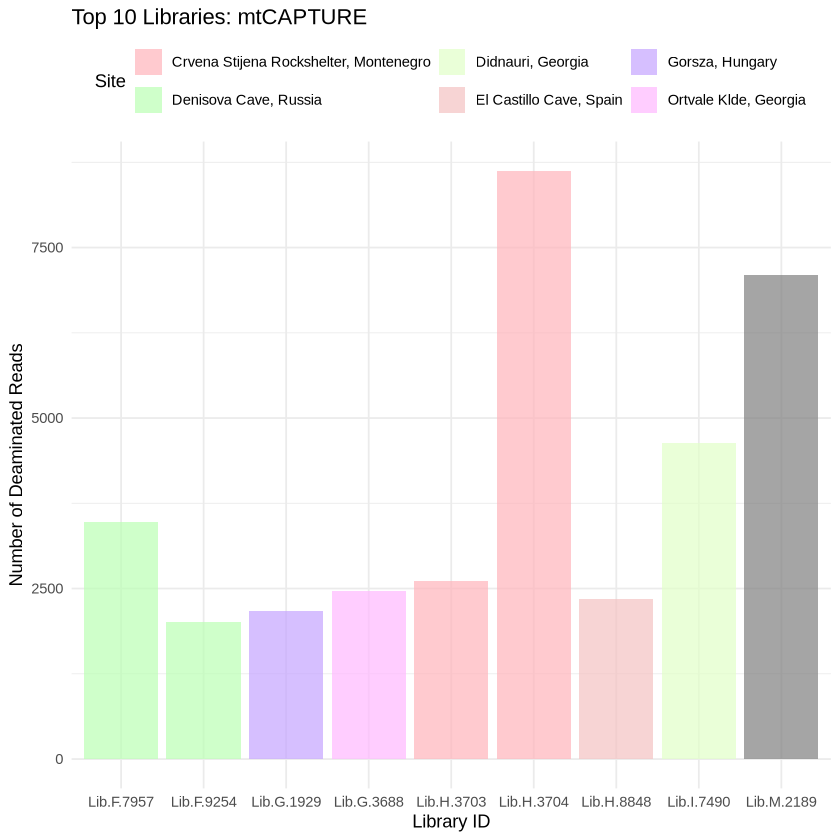

In [41]:
# Sort the data by 'Deaminated_term3' and select the top 10 libraries
mito_best <- nuclear_mito_AA163 %>% 

  arrange(desc(Deaminated_term3)) %>%   # Sort in descending order (richest first)
  head(10)             # Select top 10 libraries based on 'Deaminated_term3'


site_colors <- c(
  "Crvena Stijena Rockshelter, Montenegro" = "#FFB3BA",  # Soft Pink
  "Hohle Fels, Germany" = "#FFDFBA",                   # Peach
  "Teixoneres Cave, Spain" = "#FFFFBA",                 # Pale Yellow
  "Denisova Cave, Russia" = "#BAFFB3",                  # Pale Green
  "Nad Hronom, Slovakia" = "#BAE1FF",                   # Light Blue
  "Gorsza, Hungary" = "#C4A3FF",                        # Lavender
  "Ortvale Klde, Georgia" = "#FFB7FF",                  # Light Pink
  "Vrable, Slovakia" = "#F0E68C",                       # Khaki
  "Quincay, France" = "#E0BBE4",                        # Light Purple
  "Le Grand Abri aux Puces, France" = "#D3FFCE",        # Light Mint
  "Grotte Mandrin, France" = "#B8D8D8",                 # Light Cyan
  "El Castillo Cave, Spain" = "#F4C2C2",                # Pale Coral
  "Didnauri, Georgia" = "#E1FFC7"                       # Soft Lime Green
)

# Create the bar plot
ggplot(mito_best %>% 
         arrange(desc(Deaminated_term3)), 
       aes(x = IndexLibID_new, y = Deaminated_term3, fill = Site)) +
  geom_bar(stat = "identity", alpha = 0.7) +  # Bar plot for each library ID's deaminated reads
  labs(title = "Top 10 Libraries: mtCAPTURE",
       x = "Library ID",
       y = "Number of Deaminated Reads") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_fill_manual(values = site_colors) 



IndexLibID,MD_score,N_score,probeset,split,mapped,rmdup,target,deam,primates,⋯,country,locality,province,site_type,freshkill_id,layer_information,cultural_technological_complex,context_date_upper,context_date_lower,old_sampleid
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
Lib.M.2189,ALL,ALL,TW1+TW2,22057896,8192911,845259,414523,152091,133318,⋯,Malta,Mellieha,,Cave,SP12382,N2,,NA,NA,SP12382
Lib.L.5239,ALL,ALL,TW1,17862783,3590622,557856,279101,103794,86084,⋯,Spain,"La Peresa, Llanes",Asturias,Cave,NULL,Cave floor/ potential pigment preparation area - Galeria de las Pinturas,,NA,NA,
Lib.G.3990,ALL,ALL,AA197-AA200,6939382,1649881,127098,113240,40248,36525,⋯,Georgia,Rgani,Imereti,Rockshelter,SP20193,"Layer 5, Unit H7 - Profile XI: Sampling Col 1 (Middle Palaeolithic)",,NA,NA,SP20193
Lib.G.1929,ALL,ALL,TW1,5357195,1015214,238796,128191,36584,32994,⋯,Hungary,,,Settlement,SP9410,"Drilling Core: B4, -230cm (above layer of interest)",,NA,NA,SP9410
Lib.G.6640,ALL,ALL,AA204,6109725,1260311,33503,29964,29743,25931,⋯,Georgia,Rgani,Imereti,Rockshelter,SP20199,"Layer 4c, Unit H7 - Profile XI: Sampling Col 1 (Upper Palaeolithic) - above ash lens",,NA,NA,SP20199
Lib.G.1928,ALL,ALL,TW1,10850924,1476920,164591,78018,23936,21183,⋯,Hungary,,,Settlement,SP9409,"Drilling Core: B4, -165cm (below layer of interest)",,NA,NA,SP9409
Lib.H.8848,ALL,ALL,AA211,9433578,2335348,74710,52161,23284,20198,⋯,Spain,,,Cave,SP22885,"column B, layer XXab",,NA,NA,SP22885
Lib.H.8849,ALL,ALL,AA211,9179841,2196375,56150,27608,12707,10654,⋯,Spain,,,Cave,SP22886,"column B, layer XXab",,NA,NA,SP22886
Lib.F.7957,ALL,ALL,AA197-AA200,11919866,1937116,88985,32833,9799,8582,⋯,Russia,,,Cave,SP7522,East Chamber (Southeast profile wall) E202 Layer(s) 11.4,,NA,NA,SP7522


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


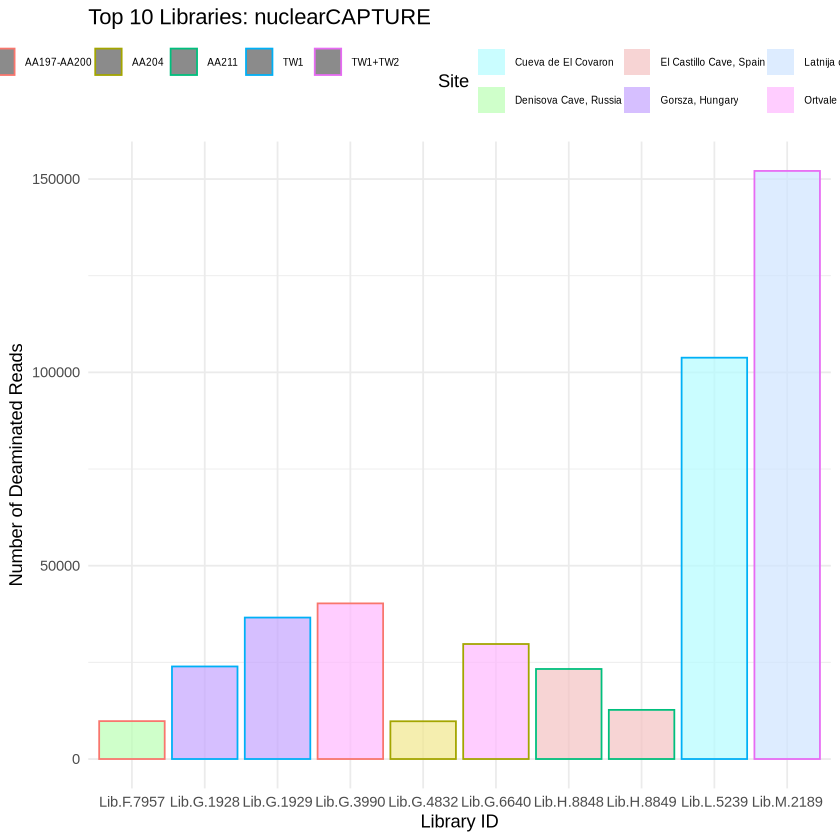

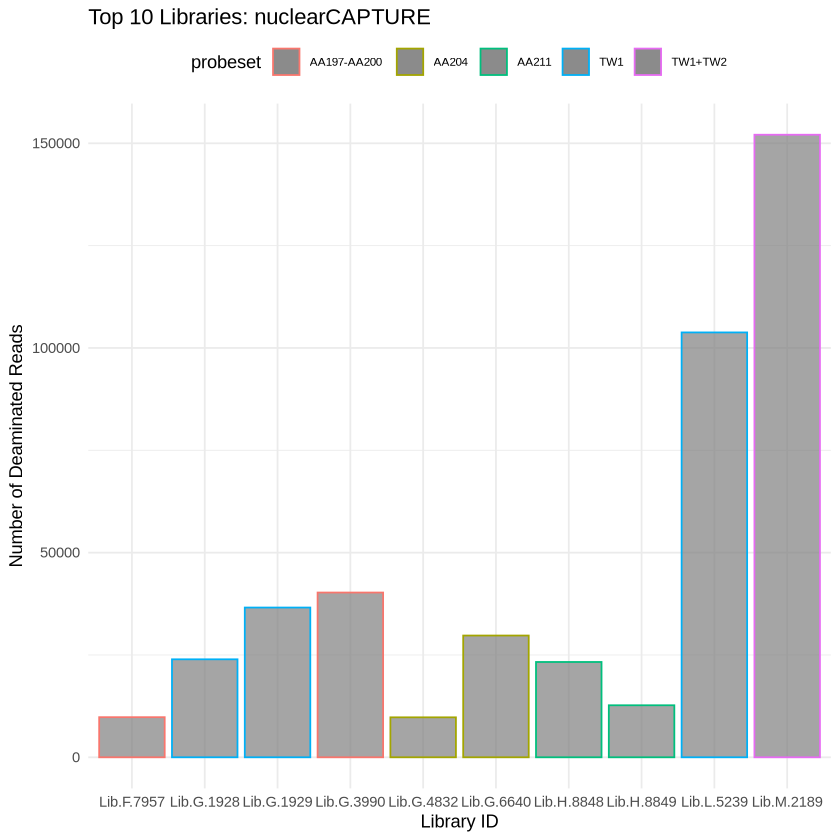

In [73]:
nucl_best <- nuclear_mito_AA163 %>% 
arrange(desc(deam)) %>%   
#filter(probeset=="AA204")
head(10) 


nucl_only_best <- nuclear %>% 
  distinct(IndexLibID, .keep_all = TRUE) %>%
  arrange(desc(deam)) %>%   # Sort by 'deam' in descending order
  head(10) 
nucl_only_best


site_colors <- c(
  "Crvena Stijena Rockshelter, Montenegro" = "#FFB3BA",  # Soft Pink
  "Hohle Fels, Germany" = "#FFDFBA",                   # Peach
  "Teixoneres Cave, Spain" = "#f3ef11",                 # Pale Yellow
  "Denisova Cave, Russia" = "#BAFFB3",                  # Pale Green
  "Nad Hronom, Slovakia" = "#BAE1FF",                   # Light Blue
  "Gorsza, Hungary" = "#C4A3FF",                        # Lavender
  "Ortvale Klde, Georgia" = "#FFB7FF",                  # Light Pink
  "Vrable, Slovakia" = "#F0E68C",                       # Khaki
  "Quincay, France" = "#E0BBE4",                        # Light Purple
  "Le Grand Abri aux Puces, France" = "#D3FFCE",        # Light Mint
  "Grotte Mandrin, France" = "#B8D8D8",                 # Light Cyan
  "El Castillo Cave, Spain" = "#F4C2C2",                # Pale Coral
  "Didnauri, Georgia" = "#E1FFC7" ,
  "Latnija cave" =  "#cee3ff",
  "Teixoneres, Spain" = "#ffdeb3" ,
  "Cueva de El Covaron"      = "#b3fcff"            # Soft Lime Green
)


 plot_good <-  ggplot(nucl_best %>% 
         arrange(desc(deam)), 
       aes(x = IndexLibID_new, y = deam, fill = Site, color =probeset)) +
  geom_bar(stat = "identity", alpha = 0.7) +  # Bar plot for each library ID's deaminated reads
  labs(title = "Top 10 Libraries: nuclearCAPTURE",
       x = "Library ID",
       y = "Number of Deaminated Reads") +
  theme_minimal() +
  theme(legend.position = "top", 
  legend.text = element_text(size = 6))+
  scale_fill_manual(values = site_colors) 

plot_good

  
  plot <- ggplot(nucl_only_best %>% 
         arrange(desc(deam)), 
       aes(x = IndexLibID, y = deam, fill=country, color =probeset)) +
  geom_bar(stat = "identity", alpha = 0.7) +  # Bar plot for each library ID's deaminated reads
  labs(title = "Top 10 Libraries: nuclearCAPTURE",
       x = "Library ID",
       y = "Number of Deaminated Reads") +
  theme_minimal() +
  theme(legend.position = "top", 
  legend.text = element_text(size = 7))+
  scale_fill_manual(values = site_colors) 
plot


  #ggsave("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclCAPTURE_top10.png",plot=plot_good, width = 20, height = 5, )



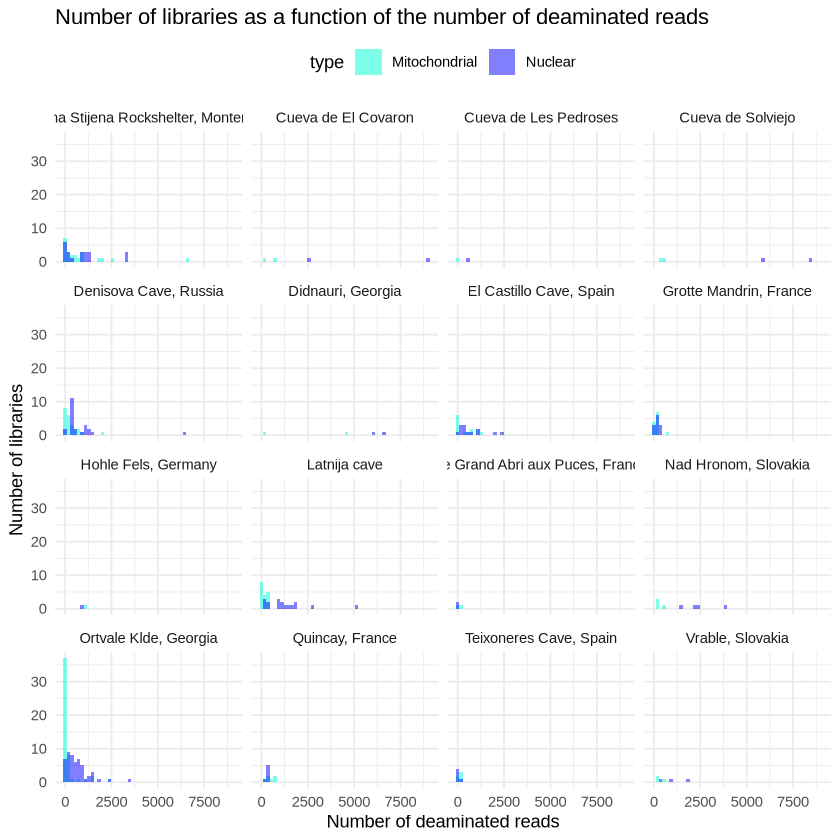

In [45]:
nuclear_mito_AA163_long <- nuclear_mito_AA163 %>%
  filter(!IndexLibID_new %in% c("Lib.M.2189", "Lib.L.5239", "Lib.G.3990", "Lib.G.1929", 
                                "Lib.G.6640", "Lib.G.1928", "Lib.H.8848", "Lib.H.8849", "Lib.F.7957", "Lib.G.4832")) %>%  # Correct filter syntax
  pivot_longer(cols = c(deam, Deaminated_term3),
               names_to = "type",
               values_to = "reads") %>%
  mutate(type = recode(type, deam = "Nuclear", Deaminated_term3 = "Mitochondrial"))



# Create the plot
plot <- ggplot(nuclear_mito_AA163_long) +
  geom_histogram(aes(x = reads, fill = type), alpha = 0.5, bins = 50, position = "identity") +  # Superimpose histograms
  labs(title = "Number of libraries as a function of the number of deaminated reads", 
       x = "Number of deaminated reads", y = "Number of libraries") +
  scale_fill_manual(values = c("Nuclear" = "blue", "Mitochondrial" = "#00ffd5")) +  # Custom colors for the legend
  theme_minimal() +
  theme(legend.position = "top") + 
  facet_wrap(~ Site) 

plot


  ggsave("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclCAPTURE_mtCAPTURE.png",plot=plot, width = 10, height = 5, )




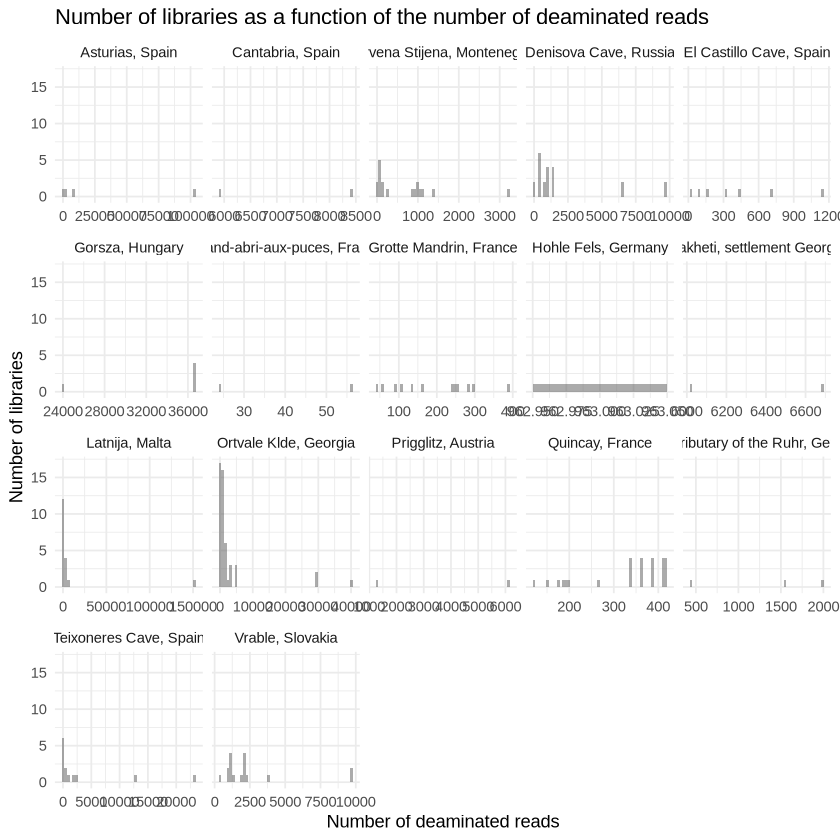

In [65]:



# Create the plot
plot <- ggplot(nuclear_with_sites) +
  geom_histogram(aes(x = deam), alpha = 0.5, bins = 50, position = "identity") +  # Superimpose histograms
  labs(title = "Number of libraries as a function of the number of deaminated reads", 
       x = "Number of deaminated reads", y = "Number of libraries") +
  theme_minimal() +
  theme(legend.position = "top") + 
  facet_wrap(~ Site, scales = "free_x")  # Adapt scale for each Site

# Print the plot
print(plot)



  ggsave("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclCAPTURE.png",plot=plot, width = 20, height = 5, )


Compare accross different capture

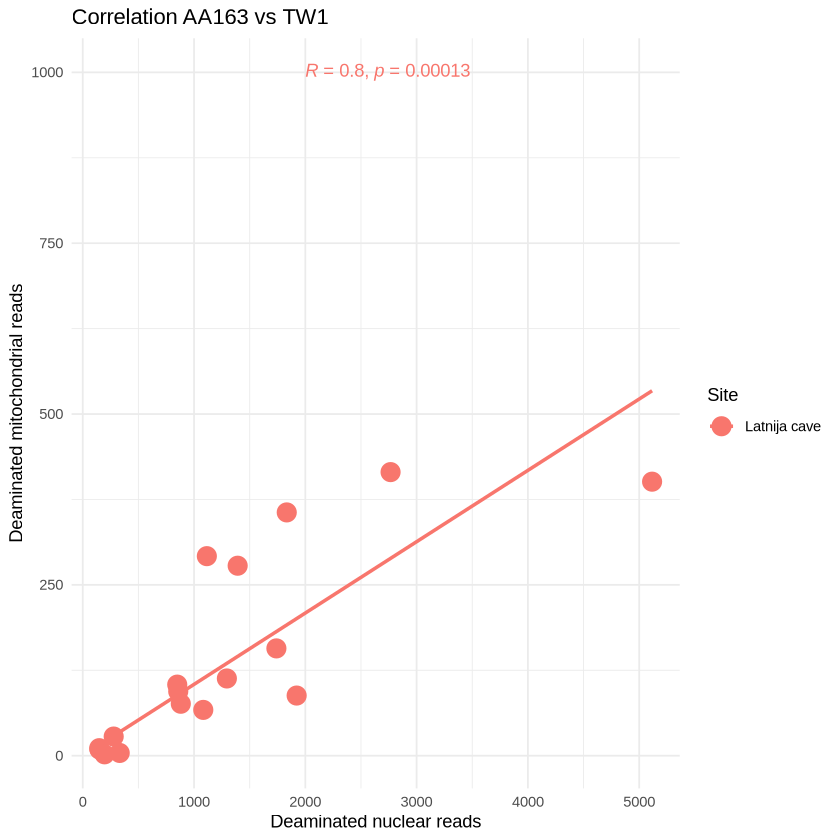

In [14]:
nuclear_mito_TW1_AA163 <- nuclear_mito %>%
  filter(probeset %in% c("TW1+TW2")) %>%
  filter(ProbeSet == "AA163") %>% 
  filter(IndexLibID_new != "Lib.M.2189")  # Assuming 'ProbeSet' is the correct column


lm_model_deam <- lm(deam ~ Deaminated_term3, data = nuclear_mito_TW1_AA163)

p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_TW1_AA163, aes(x = deam, y = Deaminated_term3, color = Site)) +
  geom_point(size =5) +
  geom_smooth(method = "lm", se = FALSE, aes(color=Site), formula=y~x+0) +  
  stat_cor(method = "pearson", label.x = 2000, label.y = 1000, aes(color=Site))  +
 # annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  #scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA163 vs TW1",
    x = "Deaminated nuclear reads",
    y = "Deaminated mitochondrial reads"
  )


In [2]:
nuclear_mito_TW1_AA75 <- nuclear_mito %>%
  filter(probeset == "TW1") %>%
  filter(ProbeSet == "AA75") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_TW1_AA75)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_TW1_AA75, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 100000, y =1000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA75 vs TW1",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(primates ~ Deaminated_term3, data = nuclear_mito_TW1_AA75)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_TW1_AA75, aes(x = primates, y = Deaminated_term3, color = SampleID)) +
  geom_point(size=4) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA75 vs TW1",
    x = "Deaminated mitochondrial reads",
    y = "Deaminated nuclear reads"
  )


ERROR: Error in nuclear_mito %>% filter(probeset == "TW1") %>% filter(ProbeSet == : could not find function "%>%"


`geom_smooth()` using formula = 'y ~ x'
Warning message in geom_smooth(method = "lm", se = FALSE, aes(Color = Site), formula = y ~ :
“Ignoring unknown aesthetics: Color”


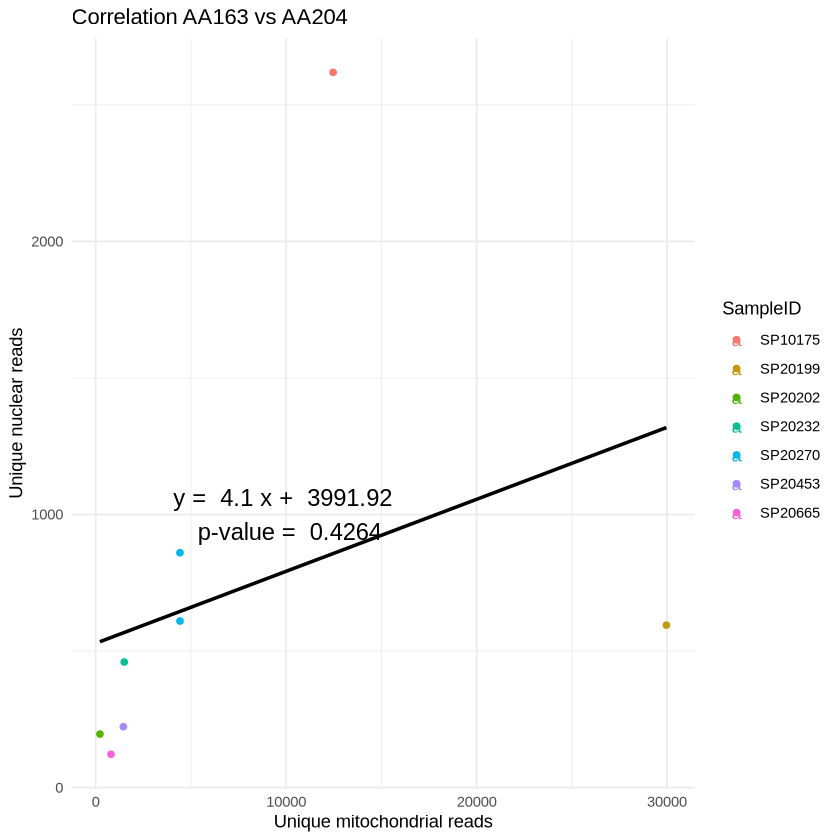

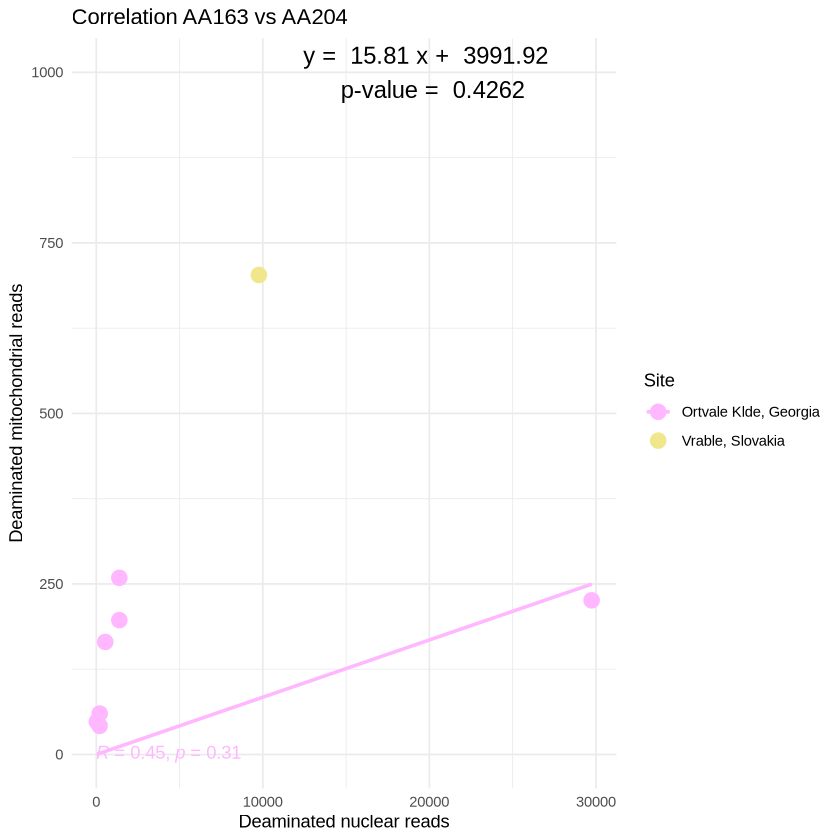

In [9]:
nuclear_mito_AA163_AA204 <- nuclear_mito %>%
  filter(probeset == "AA204") %>%
  filter(ProbeSet == "AA163") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_AA163_AA204)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA204, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 10000, y =1000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA163 vs AA204",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(deam ~ Deaminated_term3, data = nuclear_mito_AA163_AA204)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA204 #%>% filter(deam < 1000)
, aes(x = deam, y = Deaminated_term3, color = Site))+
  geom_point(size=4) +
  geom_smooth(method = "lm", se = FALSE, aes(Color=Site), formula=y~x+0) +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA163 vs AA204",
    x = "Deaminated nuclear reads",
    y = "Deaminated mitochondrial reads"
  )
  #coord_cartesian(xlim = c(0, 5000), ylim = c(0, 250)) 


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


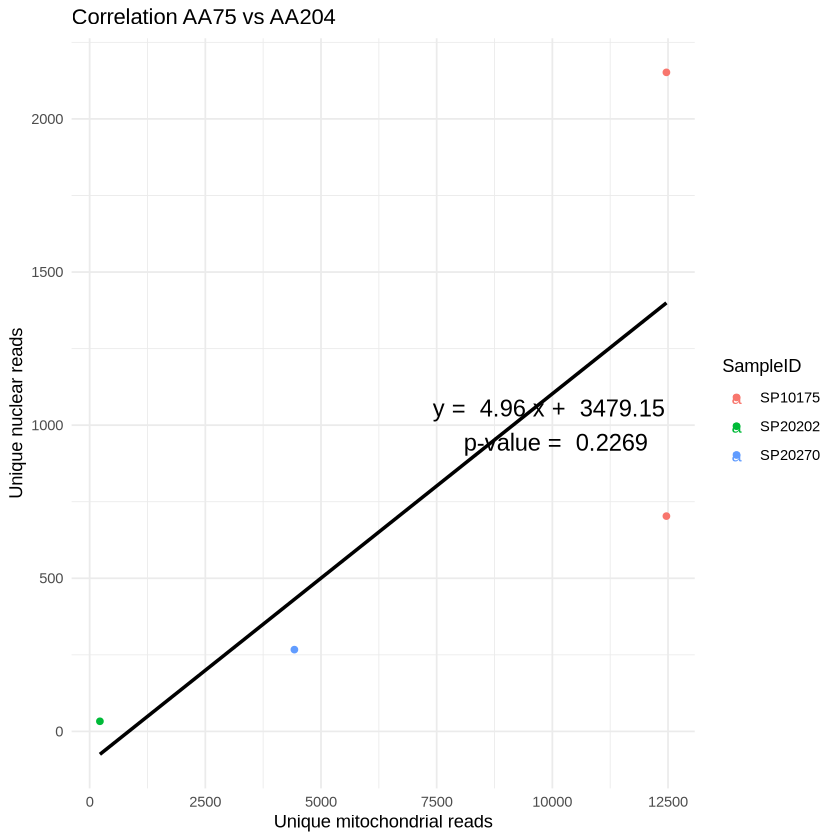

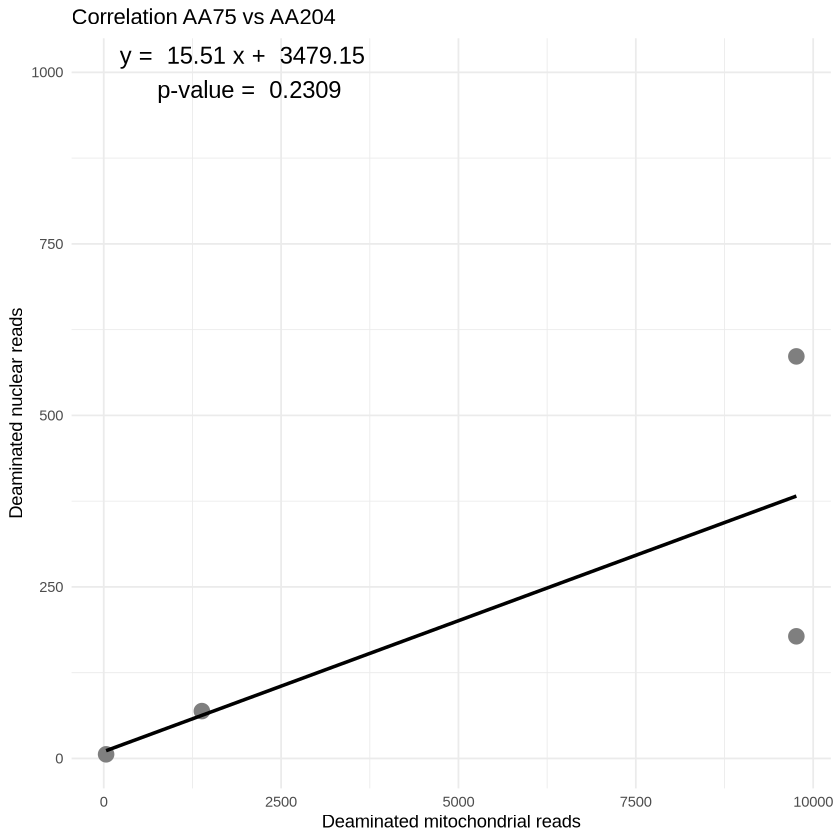

In [73]:
nuclear_mito_AA75_AA204 <- nuclear_mito %>%
  filter(probeset == "AA204") %>%
  filter(ProbeSet == "AA75") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_AA75_AA204)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_AA75_AA204, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 10000, y =1000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA75 vs AA204",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(deam ~ Deaminated_term3, data = nuclear_mito_AA75_AA204)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_AA75_AA204, aes(x = deam, y = Deaminated_term3, color = SampleID))+
  geom_point(size=4) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 2000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA75 vs AA204",
    x = "Deaminated mitochondrial reads",
    y = "Deaminated nuclear reads"
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message in geom_smooth(method = "lm", se = FALSE, aes(Color = Site), formula = y ~ :
“Ignoring unknown aesthetics: Color”
Warning message in stat_cor(method = "pearson", label.x = 200, label.y = 100, aes(Color = Site)):
“Ignoring unknown aesthetics: Color”


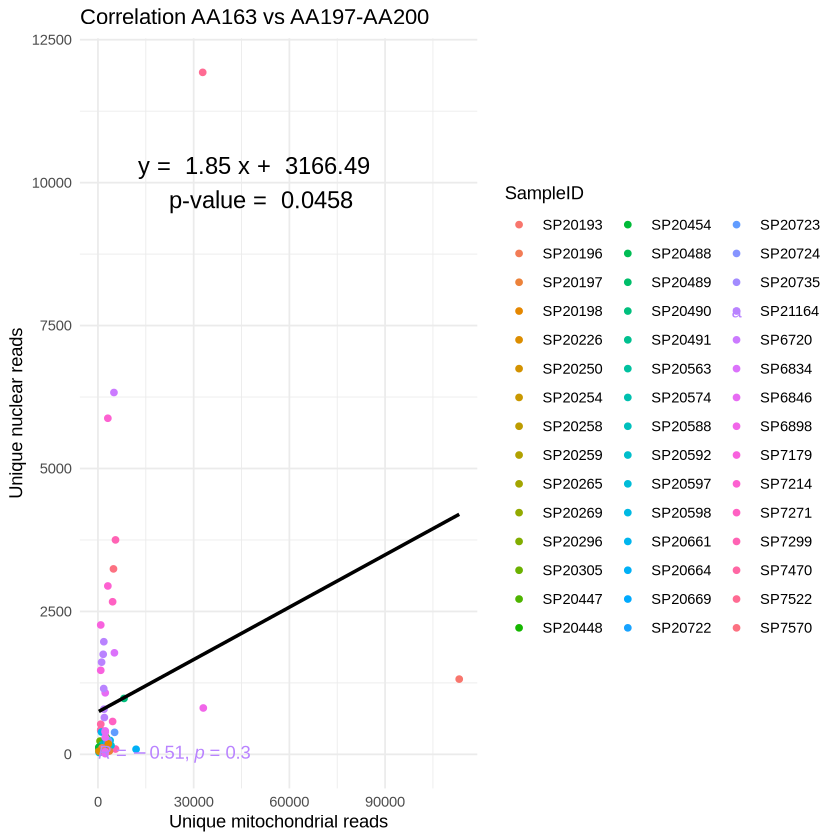

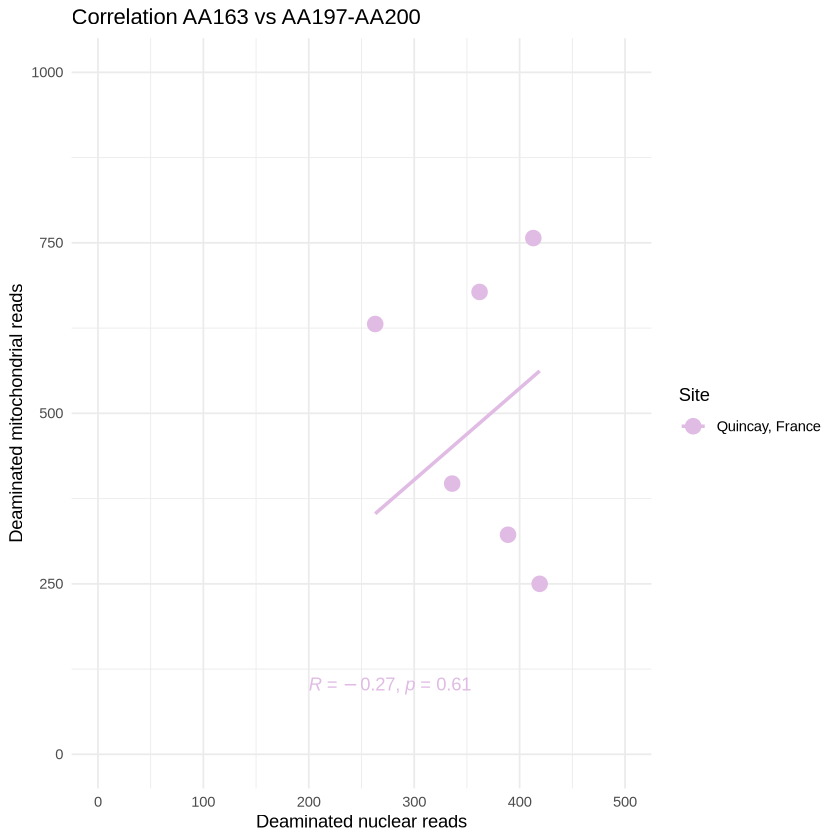

In [37]:
nuclear_mito_AA163_AA197_AA200 <- nuclear_mito %>%
  filter(probeset == "AA197-AA200") %>%
  filter(ProbeSet == "AA163") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_AA163_AA197_AA200)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA197_AA200, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 50000, y =10000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA163 vs AA197-AA200",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(deam ~ Deaminated_term3, data = nuclear_mito_AA163_AA197_AA200)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA197_AA200 %>% filter(deam<10000, Site=="Quincay, France"), aes(x = deam, y = Deaminated_term3, color = Site))+
  geom_point(size=4) +
  geom_smooth(method = "lm", se = FALSE, aes(Color=Site),  formula=y~x+0) +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 200, label.y =100, aes(Color=Site)) + 
  #annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA163 vs AA197-AA200",
    x = "Deaminated nuclear reads",
    y = "Deaminated mitochondrial reads"
  ) +
  coord_cartesian(xlim = c(0, 500), ylim = c(0, 1000)) 




`geom_smooth()` using formula = 'y ~ x'


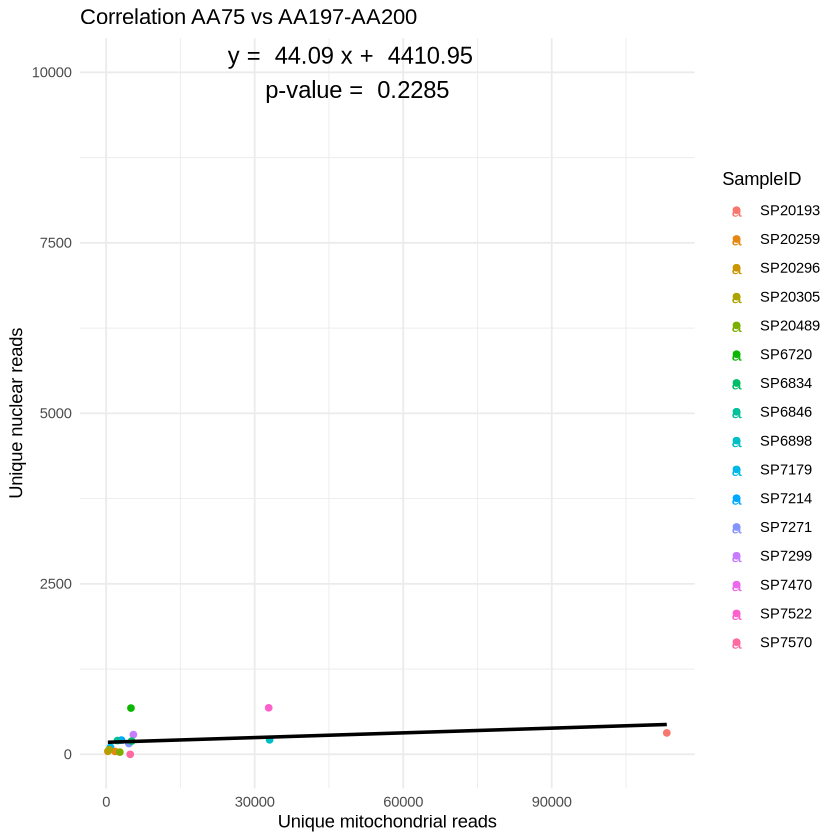

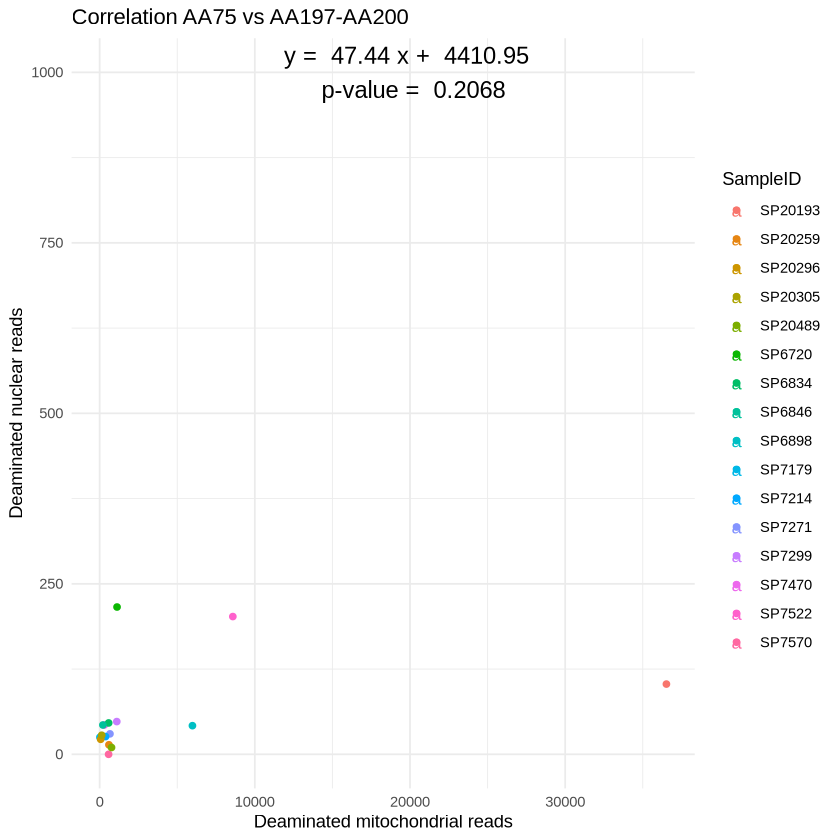

In [96]:
nuclear_mito_AA75_AA197_AA200 <- nuclear_mito %>%
  filter(probeset == "AA197-AA200") %>%
  filter(ProbeSet == "AA75") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_AA75_AA197_AA200)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_AA75_AA197_AA200, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 50000, y =10000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA75 vs AA197-AA200",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(primates ~ Deaminated_term3, data = nuclear_mito_AA75_AA197_AA200)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_AA75_AA197_AA200, aes(x = primates, y = Deaminated_term3, color = SampleID))+
  geom_point() +
  #geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 20000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA75 vs AA197-AA200",
    x = "Deaminated mitochondrial reads",
    y = "Deaminated nuclear reads"
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message in geom_smooth(method = "lm", se = FALSE, aes(Color = Site), formula = y ~ :
“Ignoring unknown aesthetics: Color”
Warning message in stat_cor(method = "pearson", label.x = 10, label.y = 10, aes(Color = Site)):
“Ignoring unknown aesthetics: Color”


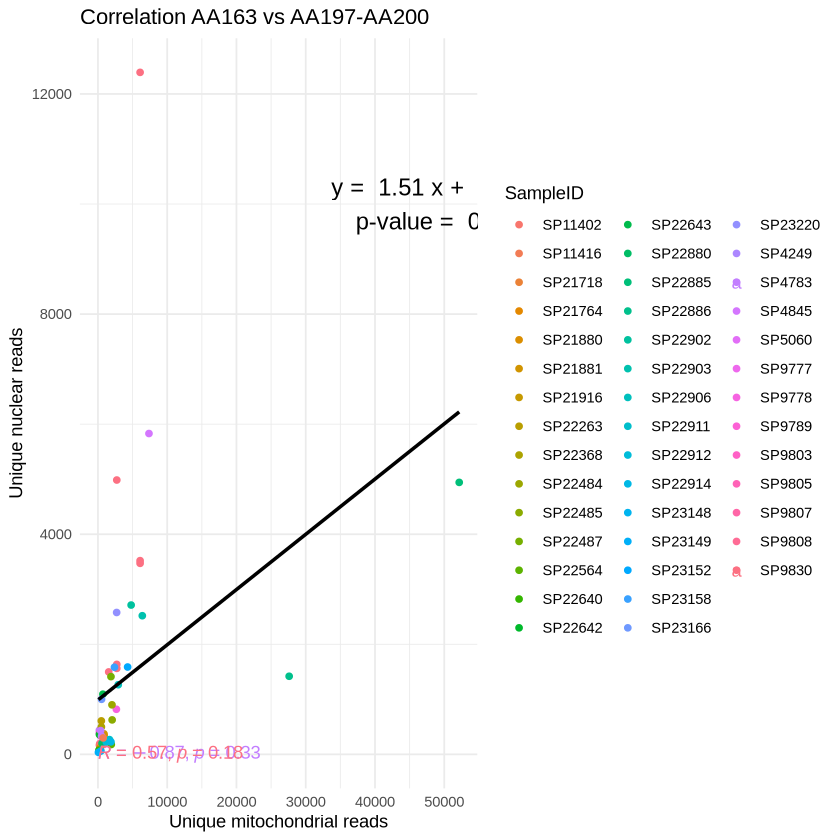

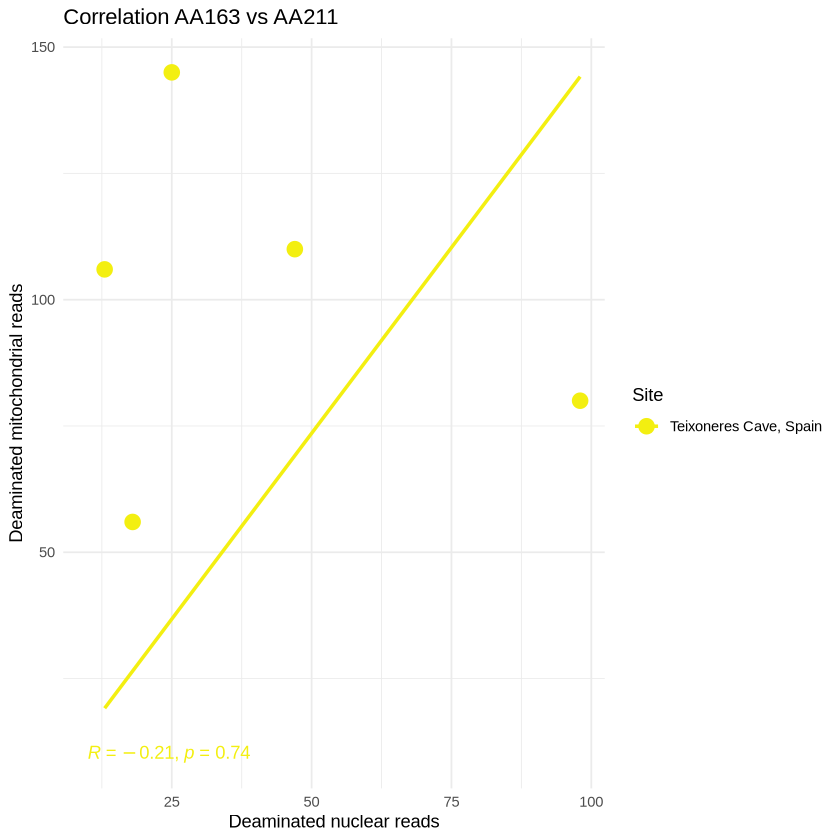

In [65]:
nuclear_mito_AA163_AA211 <- nuclear_mito %>%
  filter(probeset == "AA211") %>%
  filter(ProbeSet == "AA163") 

# Fit a linear model to get the equation and r value
lm_model <- lm(target ~ Unique, data = nuclear_mito_AA163_AA211)

p_value <- summary(lm_model)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA211, aes(x = target, y = Unique, color = SampleID)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  annotate("text", x = 50000, y =10000 , label = paste("y = ", round(coef(lm_model)[2], 2), "x + ", round(coef(lm_model)[1], 2), "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  labs(
    title = "Correlation AA163 vs AA197-AA200",
    x = "Unique mitochondrial reads",
    y = "Unique nuclear reads"
  )


lm_model_deam <- lm(deam ~ Deaminated_term3, data = nuclear_mito_AA163_AA211)
p_value <- summary(lm_model_deam)$coefficients[2, 4]
ggplot(nuclear_mito_AA163_AA211 %>% filter(deam < 5000, Site=="Teixoneres Cave, Spain"), aes(x = deam, y = Deaminated_term3, color = Site))+
  geom_point(size=4, alpha=5) +
  geom_smooth(method = "lm", se = FALSE, aes(Color=Site), formula=y~x+0) +  # Add a linear regression line
  stat_cor(method = "pearson", label.x = 10, label.y = 10, aes(Color=Site)) + 
  #annotate("text", x = 10000, y =1000 , label = paste("y = ", round(coef(lm_model_deam)[2], 2), "x + ", round(coef(lm_model)[1], 2),  "\n p-value = ", round(p_value, 4)), size = 5, color = "black") +  # Regression equation # Add correlation coefficient
  theme_minimal() +
  scale_color_manual(values = site_colors) +
  labs(
    title = "Correlation AA163 vs AA211",
    x = "Deaminated nuclear reads",
    y = "Deaminated mitochondrial reads"
  ) 
 # coord_cartesian(xlim = c(0, 5000), ylim = c(0, 1500)) 

Coverage comparison

In [3]:
#table with both results
old_id_sample <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/config/old_id_sample_to_library.csv", header=FALSE) %>%
  rename(old_sampleid = V3,
         indexlibid = V2,
         probeset = V1)

nuclear <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/config/nuclear_data_2025.csv") %>%
  full_join(old_id_sample, by = c("indexlibid", "probeset"))  %>%
  rename(IndexLibID="indexlibid")

nuclear <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/new_nuclear_results_with_cov.txt") %>%
  full_join(nuclear, by = c("IndexLibID", "probeset")) 

nuclear_mito <- fread("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclear_mito_result_with_cov.txt")
nuclear_mito$Deaminated_term3 <- as.numeric(nuclear_mito$Deaminated_term3)
nuclear_mito$primates <- as.numeric(nuclear_mito$primates)
nuclear_mito$target <- as.numeric(nuclear_mito$target)
nuclear_mito$Unique <- as.numeric(nuclear_mito$Unique)

nuclear_mito


Warning message in full_join(., old_id_sample, by = c("indexlibid", "probeset")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 86 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


IndexLibID_new,MD_score,N_score,probeset,split,mapped,rmdup,target,deam,primates,⋯,HST_der,HST_deam_der,D-S_der,D-S_deam_der,D_der,D_deam_der,S_der,S_deam_der,V67,Coverage_Deaminated_term3
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Lib.E.7082,ALL,ALL,AA211,5199214,421833,1327,364,34,24,⋯,,,,,,,,,NA,0.003742154
Lib.E.8092,ALL,ALL,AA211,2206712,214080,11811,7367,963,823,⋯,(11233:1)(15346:2)(16083:1),,(282:6)(3277:1)(3753:1)(6935:1)(6938:1)(8203:3)(9434:1)(9647:1)(9758:1)(10223:1)(11016:1)(11071:1)(12528:1)(12756:2)(14950:1),(282:1)(8203:1)(9647:1)(9758:1)(11071:1)(12528:1),(4092:1)(4959:1)(6566:1)(8488:1)(12561:1)(13923:1),(4092:1)(6566:1),(6668:1)(7774:1)(13365:1)(13687:1)(14384:1)(15640:1),(7774:1)(13687:1)(15640:1),NA,0.070255915
Lib.E.8104,ALL,ALL,AA211,3401361,238051,1358,210,13,6,⋯,,,(750:1)(12756:1),,,,(7094:1),(7094:1),NA,0.006397875
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:1)(6483:1)(6485:1)(7232:1)(7789:1)(13629:1),(750:1)(6483:1)(6485:1),(4622:1)(8008:1)(9566:1)(13434:1)(13635:1),(9566:1),,,NA,0.001388218
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(868:1)(1761:1)(7232:1)(7789:1)(8545:1)(10172:1)(13968:1)(14839:2)(16070:1),(7789:1)(8545:1)(10172:1)(16070:1),(3832:1)(4047:1)(4622:1)(6917:1)(8008:1)(9566:1)(12561:1)(16081:1),(4047:1)(6917:1)(9566:1)(12561:1)(16081:1),,,NA,0.002414293
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:4)(868:2)(1009:1)(1761:2)(2955:1)(3714:1)(4991:1)(6483:1)(6485:1)(7232:4)(7789:2)(8140:1)(8152:1)(8203:3)(8521:4)(8545:6)(9060:2)(9075:3)(9168:1)(9254:1)(9527:1)(9530:1)(9758:1)(9839:1)(10172:2)(11016:1)(12064:2)(12801:1)(13629:1)(13827:1)(13968:1)(14839:2)(15100:1)(15742:2)(15883:1)(15941:1)(16070:1),(750:2)(4991:1)(6483:1)(6485:1)(7789:1)(8140:1)(8152:1)(8203:3)(8521:1)(8545:3)(9168:1)(9758:1)(9839:1)(10172:2)(12801:1)(13827:1)(15100:1)(15742:1)(15941:1)(16070:1),(596:1)(736:3)(3636:1)(3832:3)(3870:1)(3888:3)(4047:2)(4622:3)(4959:2)(5021:1)(6917:1)(7609:2)(7621:1)(7664:1)(7961:1)(8008:1)(8488:1)(8772:1)(8784:2)(9080:2)(9566:1)(9932:1)(10966:2)(12193:1)(12561:2)(13434:2)(13528:2)(13635:1)(13923:1)(14662:1)(16081:1)(16487:1)(16527:2),(736:1)(3832:1)(3888:2)(4047:1)(4622:1)(4959:1)(6917:1)(7609:1)(7621:1)(8772:1)(8784:2)(9566:1)(10966:1)(12561:1)(13434:1)(13528:1)(14662:1)(16081:1)(16527:1),,,NA,0.011286818
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:3)(868:1)(1009:1)(2284:1)(2955:1)(3978:1)(6242:1)(6483:1)(6485:1)(6935:1)(6938:1)(7232:3)(7789:3)(8203:3)(8521:4)(8545:7)(9060:1)(9075:1)(9168:1)(9254:1)(9527:1)(9530:1)(9758:1)(10172:1)(11016:1)(11147:1)(12064:2)(12801:1)(13629:1)(13827:1)(13968:1)(14476:1)(14839:2)(15100:1)(15742:2)(15883:1)(15941:1),(750:1)(6242:1)(6483:1)(6485:1)(7789:1)(8203:3)(8521:1)(8545:4)(9168:1)(9758:1)(10172:1)(12801:1)(13827:1)(14476:1)(15100:1)(15742:1)(15941:1),(736:2)(3636:1)(3832:2)(3870:1)(3888:2)(3957:1)(4047:2)(4622:1)(4659:1)(4959:1)(5021:1)(6917:2)(7609:2)(7621:1)(7664:1)(7961:1)(8008:1)(8488:1)(8772:1)(8784:1)(9566:2)(9932:1)(10966:2)(12193:1)(12561:2)(13434:3)(13528:2)(13635:1)(13923:1)(14662:1)(14971:1)(16487:1)(16527:1),(3832:1)(3888:1)(4047:1)(4659:1)(6917:1)(7609:1)(7621:1)(8772:1)(8784:1)(9566:2)(10966:1)(12561:1)(13434:1)(13528:1)(14662:1)(16527:1),,,NA,0.010803959
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:4)(868:2)(1009:1)(1405:1)(1761:2)(2284:1)(2955:1)(3496:1)(3747:1)(3753:1)(3978:1)(4991:1)(6242:1)(6483:1)(6485:1)(7232:3)(7316:1)(7789:4)(8140:1)(8152:1)(8203:6)(8521:5)(8545:9)(9060:2)(9075:3)(9168:2)(9254:1)(9527:1)(9530:1)(9758:2)(9839:1)(10172:2)(11016:1)(12064:2)(12801:2)(13629:1)(13827:1)(13968:1)(14839:2)(15100:1)(15250:1)(15742:4)(15883:2)(15941:1)(16070:1),(750:1)(4991:1)(6242:1)(6483:1)(6485:1)(7789:1)(8140:1)(8152:1)(8203:4)(8521:1)(8545:4)(9168:2)(9758:2)(9839:1)(10172:2)(12801:2)(13827:1)(15100:1)(15742:2)(15883:1)(15941:1)(16

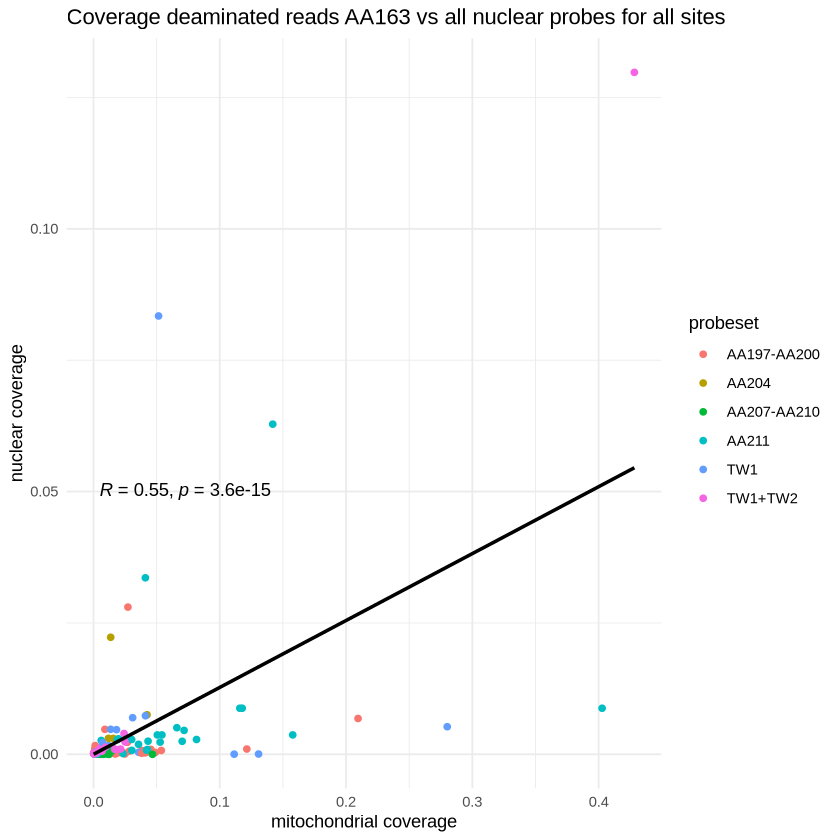

In [45]:
nuclear_mito <- nuclear_mito %>%
  filter(ProbeSet == "AA163") %>% 
  filter(probeset != "AA170-AA172") %>%
  mutate(new_nculear_coverage = (coverage_burden_corrected/1000)) 
  #filter(Coverage_Deaminated_term3 < 0.2) %>%
  #filter(new_nculear_coverage < 0.02)

#the nuclear coverage is calculated (coverage/number_of_snps_MD8_N3)*1000)
#the mitochondrial coverage is calculated (number_of_reads/16568)
ggplot(nuclear_mito, aes(x = Coverage_Deaminated_term3, y = new_nculear_coverage, color = probeset)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black", formula=y~x+0) +
  stat_cor(method = "pearson", label.x = 0.005, label.y = 0.05, color="black") + 
  theme_minimal() +
  labs(
    title = "Coverage deaminated reads AA163 vs all nuclear probes for all sites",
    x = "mitochondrial coverage",
    y = "nuclear coverage"
  ) 
  #coord_cartesian(xlim = c(0, 0.5), ylim = c(0, 0.15)) 

  


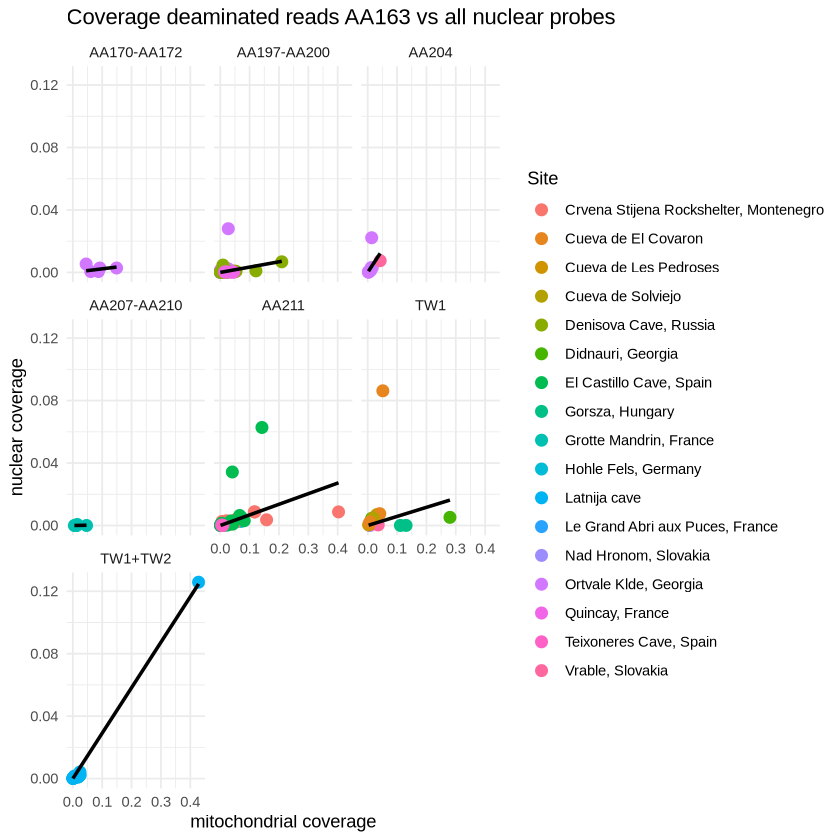

In [51]:

site_counts <- nuclear_mito %>%
  group_by(Site) %>%
  summarize(count = n()) 

plot <- ggplot(nuclear_mito, aes(x = Coverage_Deaminated_term3 , y = coverage_average, color = Site))+
  geom_point(size=3) +
  geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x + 0) +
  #stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  theme_minimal() +
  labs(
    title = "Coverage deaminated reads AA163 vs all nuclear probes",
    x = "mitochondrial coverage",
    y = "nuclear coverage"
  ) +
  #coord_cartesian(xlim = c(0, 0.5), ylim = c(0, 0.10)) +
  facet_wrap(~ probeset) 
  #geom_text(data = site_counts, aes(x = 0.1, y = 0.1, label = paste("n =", count)), inherit.aes = FALSE)  
  #heme(strip.text = element_blank())

plot

ggsave("/mnt/expressions/Aurore/sediment_pipeline_v0/overview_output_summary/nuclear_mito_plot.png", plot = plot, width = 20, height = 10, dpi = 300)


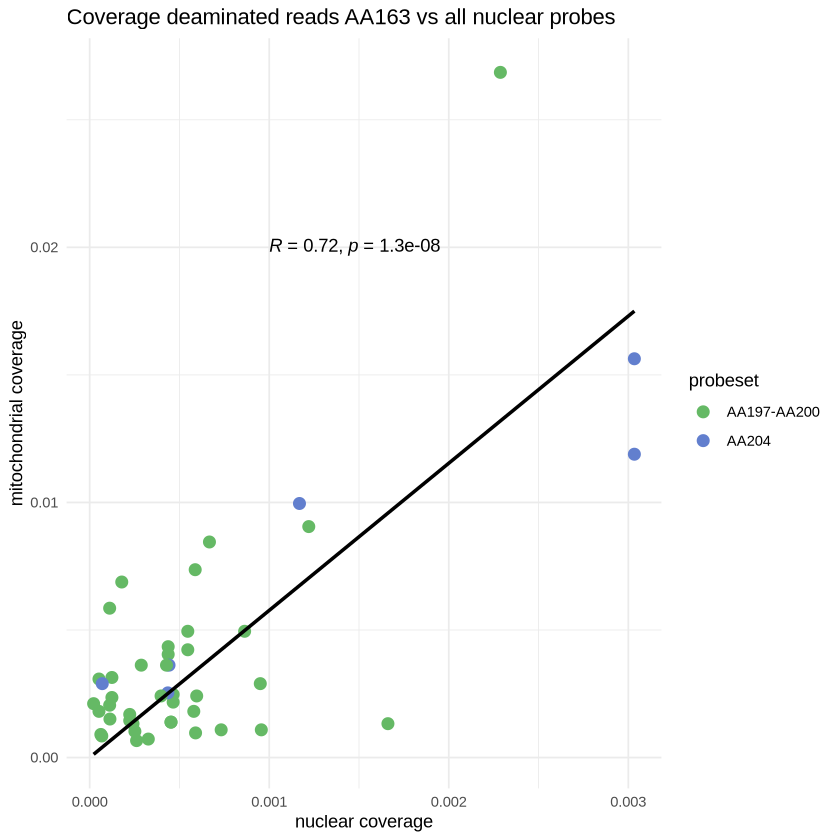

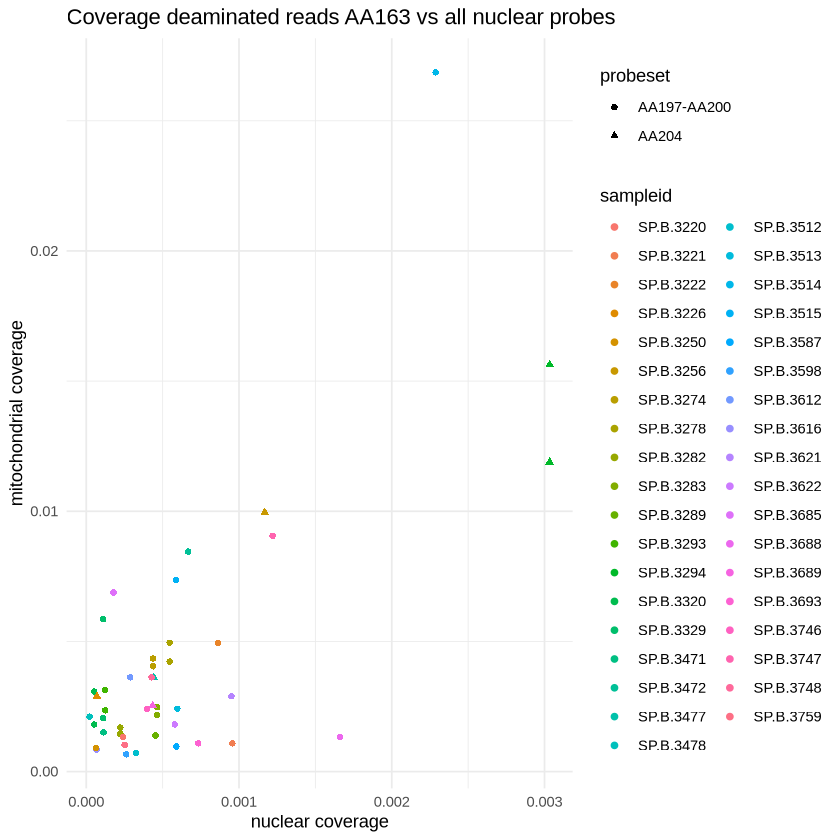

In [19]:
nuclear_mito_georgia <- nuclear_mito %>%
  filter(Site == "Ortvale Klde, Georgia") %>%  # Filter for the specific site
  filter(probeset != "AA170-AA172") %>%
  filter(ProbeSet=="AA163")  # Exclude the probeset
  #filter(duplicated(sampleid) | duplicated(sampleid, fromLast = TRUE))  # Keep non-unique sample IDs
#nuclear_mito_georgia
  #filter(probeset != "AA170-AA172") 

site_counts <- nuclear_mito_georgia %>%
  group_by(Site) %>%
  summarize(count = n())

plot <- ggplot(nuclear_mito_georgia, aes(x = new_nculear_coverage, y = Coverage_Deaminated_term3, color = probeset))+
  geom_point(size=3) +
  geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x + 0) +
  stat_cor(method = "pearson", label.x = 0.001, label.y = 0.02, color = "black") + 
  scale_color_manual(values = c("AA204" = "#627fce", "AA197-AA200" = "#65b965")) +
  theme_minimal() +
  labs(
    title = "Coverage deaminated reads AA163 vs all nuclear probes",
    x = "nuclear coverage",
    y = "mitochondrial coverage"
  ) 
  #coord_cartesian(xlim = c(0, 0.5), ylim = c(0, 0.10)) +
  #geom_text(data = site_counts, aes(x = 0.0025, y = 0.0001, label = paste("n =", count)), inherit.aes = FALSE)  
  #heme(strip.text = element_blank())

plot

plot <- ggplot(nuclear_mito_georgia, aes(x = new_nculear_coverage, y = Coverage_Deaminated_term3, color = sampleid, shape=probeset))+
  geom_point() +
  #geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x + 0) +
  #stat_cor(method = "pearson", label.x = 5, label.y = 0.5) + 
  theme_minimal() +
  labs(
    title = "Coverage deaminated reads AA163 vs all nuclear probes",
    x = "nuclear coverage",
    y = "mitochondrial coverage"
  ) 
  #coord_cartesian(xlim = c(0, 0.05), ylim = c(0, 0.05)) 
  #heme(strip.text = element_blank())

plot

Test probability

In [30]:
nuclear_mito

IndexLibID_new,MD_score,N_score,probeset,split,mapped,rmdup,target,deam,primates,⋯,HST_der,HST_deam_der,D-S_der,D-S_deam_der,D_der,D_deam_der,S_der,S_deam_der,V67,Coverage_Deaminated_term3
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Lib.E.7082,ALL,ALL,AA211,5199214,421833,1327,364,34,24,⋯,,,,,,,,,NA,0.003742154
Lib.E.8092,ALL,ALL,AA211,2206712,214080,11811,7367,963,823,⋯,(11233:1)(15346:2)(16083:1),,(282:6)(3277:1)(3753:1)(6935:1)(6938:1)(8203:3)(9434:1)(9647:1)(9758:1)(10223:1)(11016:1)(11071:1)(12528:1)(12756:2)(14950:1),(282:1)(8203:1)(9647:1)(9758:1)(11071:1)(12528:1),(4092:1)(4959:1)(6566:1)(8488:1)(12561:1)(13923:1),(4092:1)(6566:1),(6668:1)(7774:1)(13365:1)(13687:1)(14384:1)(15640:1),(7774:1)(13687:1)(15640:1),NA,0.070255915
Lib.E.8104,ALL,ALL,AA211,3401361,238051,1358,210,13,6,⋯,,,(750:1)(12756:1),,,,(7094:1),(7094:1),NA,0.006397875
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:1)(6483:1)(6485:1)(7232:1)(7789:1)(13629:1),(750:1)(6483:1)(6485:1),(4622:1)(8008:1)(9566:1)(13434:1)(13635:1),(9566:1),,,NA,0.001388218
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(868:1)(1761:1)(7232:1)(7789:1)(8545:1)(10172:1)(13968:1)(14839:2)(16070:1),(7789:1)(8545:1)(10172:1)(16070:1),(3832:1)(4047:1)(4622:1)(6917:1)(8008:1)(9566:1)(12561:1)(16081:1),(4047:1)(6917:1)(9566:1)(12561:1)(16081:1),,,NA,0.002414293
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:4)(868:2)(1009:1)(1761:2)(2955:1)(3714:1)(4991:1)(6483:1)(6485:1)(7232:4)(7789:2)(8140:1)(8152:1)(8203:3)(8521:4)(8545:6)(9060:2)(9075:3)(9168:1)(9254:1)(9527:1)(9530:1)(9758:1)(9839:1)(10172:2)(11016:1)(12064:2)(12801:1)(13629:1)(13827:1)(13968:1)(14839:2)(15100:1)(15742:2)(15883:1)(15941:1)(16070:1),(750:2)(4991:1)(6483:1)(6485:1)(7789:1)(8140:1)(8152:1)(8203:3)(8521:1)(8545:3)(9168:1)(9758:1)(9839:1)(10172:2)(12801:1)(13827:1)(15100:1)(15742:1)(15941:1)(16070:1),(596:1)(736:3)(3636:1)(3832:3)(3870:1)(3888:3)(4047:2)(4622:3)(4959:2)(5021:1)(6917:1)(7609:2)(7621:1)(7664:1)(7961:1)(8008:1)(8488:1)(8772:1)(8784:2)(9080:2)(9566:1)(9932:1)(10966:2)(12193:1)(12561:2)(13434:2)(13528:2)(13635:1)(13923:1)(14662:1)(16081:1)(16487:1)(16527:2),(736:1)(3832:1)(3888:2)(4047:1)(4622:1)(4959:1)(6917:1)(7609:1)(7621:1)(8772:1)(8784:2)(9566:1)(10966:1)(12561:1)(13434:1)(13528:1)(14662:1)(16081:1)(16527:1),,,NA,0.011286818
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:3)(868:1)(1009:1)(2284:1)(2955:1)(3978:1)(6242:1)(6483:1)(6485:1)(6935:1)(6938:1)(7232:3)(7789:3)(8203:3)(8521:4)(8545:7)(9060:1)(9075:1)(9168:1)(9254:1)(9527:1)(9530:1)(9758:1)(10172:1)(11016:1)(11147:1)(12064:2)(12801:1)(13629:1)(13827:1)(13968:1)(14476:1)(14839:2)(15100:1)(15742:2)(15883:1)(15941:1),(750:1)(6242:1)(6483:1)(6485:1)(7789:1)(8203:3)(8521:1)(8545:4)(9168:1)(9758:1)(10172:1)(12801:1)(13827:1)(14476:1)(15100:1)(15742:1)(15941:1),(736:2)(3636:1)(3832:2)(3870:1)(3888:2)(3957:1)(4047:2)(4622:1)(4659:1)(4959:1)(5021:1)(6917:2)(7609:2)(7621:1)(7664:1)(7961:1)(8008:1)(8488:1)(8772:1)(8784:1)(9566:2)(9932:1)(10966:2)(12193:1)(12561:2)(13434:3)(13528:2)(13635:1)(13923:1)(14662:1)(14971:1)(16487:1)(16527:1),(3832:1)(3888:1)(4047:1)(4659:1)(6917:1)(7609:1)(7621:1)(8772:1)(8784:1)(9566:2)(10966:1)(12561:1)(13434:1)(13528:1)(14662:1)(16527:1),,,NA,0.010803959
Lib.F.7028,ALL,ALL,AA197-AA200,2311998,348999,8097,878,353,303,⋯,,,(750:4)(868:2)(1009:1)(1405:1)(1761:2)(2284:1)(2955:1)(3496:1)(3747:1)(3753:1)(3978:1)(4991:1)(6242:1)(6483:1)(6485:1)(7232:3)(7316:1)(7789:4)(8140:1)(8152:1)(8203:6)(8521:5)(8545:9)(9060:2)(9075:3)(9168:2)(9254:1)(9527:1)(9530:1)(9758:2)(9839:1)(10172:2)(11016:1)(12064:2)(12801:2)(13629:1)(13827:1)(13968:1)(14839:2)(15100:1)(15250:1)(15742:4)(15883:2)(15941:1)(16070:1),(750:1)(4991:1)(6242:1)(6483:1)(6485:1)(7789:1)(8140:1)(8152:1)(8203:4)(8521:1)(8545:4)(9168:2)(9758:2)(9839:1)(10172:2)(12801:2)(13827:1)(15100:1)(15742:2)(15883:1)(15941:1)(16

In [73]:
nuclear_mito_proba <- nuclear_mito %>% 
    filter(Deaminated_term3 < 100) 

missed_good_results <- sum(nuclear_mito_proba$primates >= 1000)
missed_good_results
# Calculate the total number of filtered cases
total_filtered_cases <- length(nuclear_mito_proba)
total_filtered_cases
# Calculate the probability of missing a good nuclear result (N <= 1000) when M < 100
probability_of_miss <- missed_good_results / total_filtered_cases

# Output the result
cat(sprintf("Probability of missing a good nuclear result (N <= 1000) when M < 100: %.4f", probability_of_miss))


 


[1] 6

[1] 101

Probability of missing a good nuclear result (N <= 1000) when M < 100: 0.0594

In [50]:


# Function to calculate missed good results for a given probeset and threshold
calculate_missed_good_results <- function(data, threshold_x, probeset_nucl) {
  # Filter the data where Mitochondrial reads (Deaminated_term3) are <= threshold_x and match the probeset
  filtered_data <- data %>%
    filter(Deaminated_term3 > threshold_x) %>%
    filter(probeset == probeset_nucl) %>% 
    filter(ProbeSet ==  "AA163")
      # Filter by probeset
  
  # Count how many nuclear reads (deam) are > 1000 (missed good results)
  missed_good_results <- sum(filtered_data$deam < 1000)
  
  # Total number of filtered cases
  filtered_data_tot <- nrow(filtered_data)
  
  # Calculate the probability of missing a good nuclear result (N > 1000)
  probability_of_miss <- missed_good_results / filtered_data_tot
  
  return(probability_of_miss)
}

# Create a sequence of thresholds to test (from 0 to the max value of Mitochondrial reads)
thresholds <- seq(0, max(nuclear_mito$Deaminated_term3), by = 10)

# Define probesets to be analyzed
probesets <- c("TW1", "AA204", "AA197-AA200", "AA211", "TW1+TW2")

# Calculate missed good results for each probeset and threshold
missed_results_list <- lapply(probesets, function(probeset) {
  # For each probeset, calculate the missed results for all thresholds
  sapply(thresholds, function(x) calculate_missed_good_results(nuclear_mito, x, probeset))
})

# Convert the results into a data frame for plotting
missed_results_df <- data.frame(
  Threshold = rep(thresholds, times = length(probesets)),
  Missed_Good_Results = unlist(missed_results_list),
  Probeset = rep(probesets, each = length(thresholds))
)



Warning message:
“Removed 1288 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1288 rows containing missing values or values outside the scale range
(`geom_point()`).”


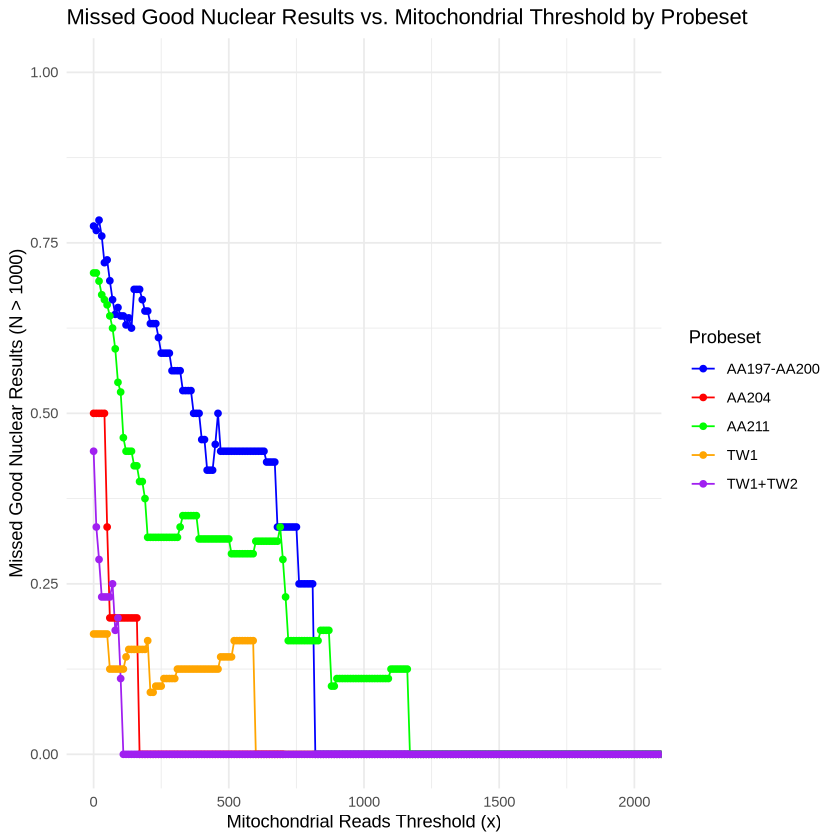

In [52]:

ggplot(missed_results_df, aes(x = Threshold, y = Missed_Good_Results, color = Probeset)) +
  geom_line() +          # Line plot
  geom_point() +         # Points on the plot
  labs(title = "Missed Good Nuclear Results vs. Mitochondrial Threshold by Probeset",
       x = "Mitochondrial Reads Threshold (x)",
       y = "Missed Good Nuclear Results (N > 1000)") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green", "orange", "purple")) +
  coord_cartesian(xlim = c(0, 2000), ylim = c(0, 1))